In [1]:
# Import necessary libraries
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import matplotlib.pyplot as plt  # For plotting and visualization
import seaborn as sns  # For enhanced visualizations

# Scikit-learn imports
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# TensorFlow imports (for Neural Networks)
import tensorflow as tf

# Suppress warnings (optional, for cleaner output)
import warnings
warnings.filterwarnings('ignore')


In [4]:
file_path = r'C:\Users\diyag\Desktop\projects\python_practice\Data Science\project\seattle-weather.csv'
data = pd.read_csv(file_path)

# Display basic info
print("Dataset Info:")
print(data.info())
print(data.head())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB
None
         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain


In [5]:
# Step 1: Standardizing the numerical features
numerical_cols = ['precipitation', 'temp_max', 'temp_min', 'wind']
scaler = StandardScaler()
standardized_data = data.copy()
standardized_data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

print("\nStandardized Data (First 5 Rows):\n", standardized_data.head())



Standardized Data (First 5 Rows):
          date  precipitation  temp_max  temp_min      wind  weather
0  2012-01-01      -0.453650 -0.495299 -0.644212  1.014980  drizzle
1  2012-01-02       1.178598 -0.794731 -1.082347  0.875833     rain
2  2012-01-03      -0.333852 -0.645015 -0.206077 -0.654780     rain
3  2012-01-04       2.586224 -0.576962 -0.524720  1.014980     rain
4  2012-01-05      -0.258978 -1.026111 -1.082347  1.989006     rain


In [6]:
# Step 2: Prepare Data for Models
X = standardized_data[['temp_min']]  # Feature
y = standardized_data['temp_max']  # Target

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Step 3: Apply Models
# 1. Linear Regression
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)
y_pred_lin = lin_reg.predict(X_test_poly)
mae_lin = mean_absolute_error(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)


In [8]:
# 2. Neural Network
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])
nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = nn_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, validation_split=0.2)
y_pred_nn = nn_model.predict(X_test).flatten()
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [9]:
# 3. Decision Tree
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)


In [10]:
# 4. Random Forest
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)
mae_forest = mean_absolute_error(y_test, y_pred_forest)
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)


In [11]:
# 5. Support Vector Machine
svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)


In [12]:
# 6. Gradient Boosting Machines
gboost = GradientBoostingRegressor(random_state=42)
gboost.fit(X_train, y_train)
y_pred_gboost = gboost.predict(X_test)
mae_gboost = mean_absolute_error(y_test, y_pred_gboost)
mse_gboost = mean_squared_error(y_test, y_pred_gboost)
r2_gboost = r2_score(y_test, y_pred_gboost)

In [13]:

# Step 4: Compare Results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Neural Network', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting'],
    'MAE': [mae_lin, mae_nn, mae_tree, mae_forest, mae_svr, mae_gboost],
    'MSE': [mse_lin, mse_nn, mse_tree, mse_forest, mse_svr, mse_gboost],
    'R2 Score': [r2_lin, r2_nn, r2_tree, r2_forest, r2_svr, r2_gboost]
})

print("\nModel Comparison Results:\n", results)



Model Comparison Results:
                Model       MAE       MSE  R2 Score
0  Linear Regression  0.379035  0.217867  0.793335
1     Neural Network  0.374429  0.214067  0.796939
2      Decision Tree  0.380990  0.222960  0.788503
3      Random Forest  0.381134  0.223136  0.788337
4                SVM  0.373629  0.216031  0.795077
5  Gradient Boosting  0.379399  0.220499  0.790838


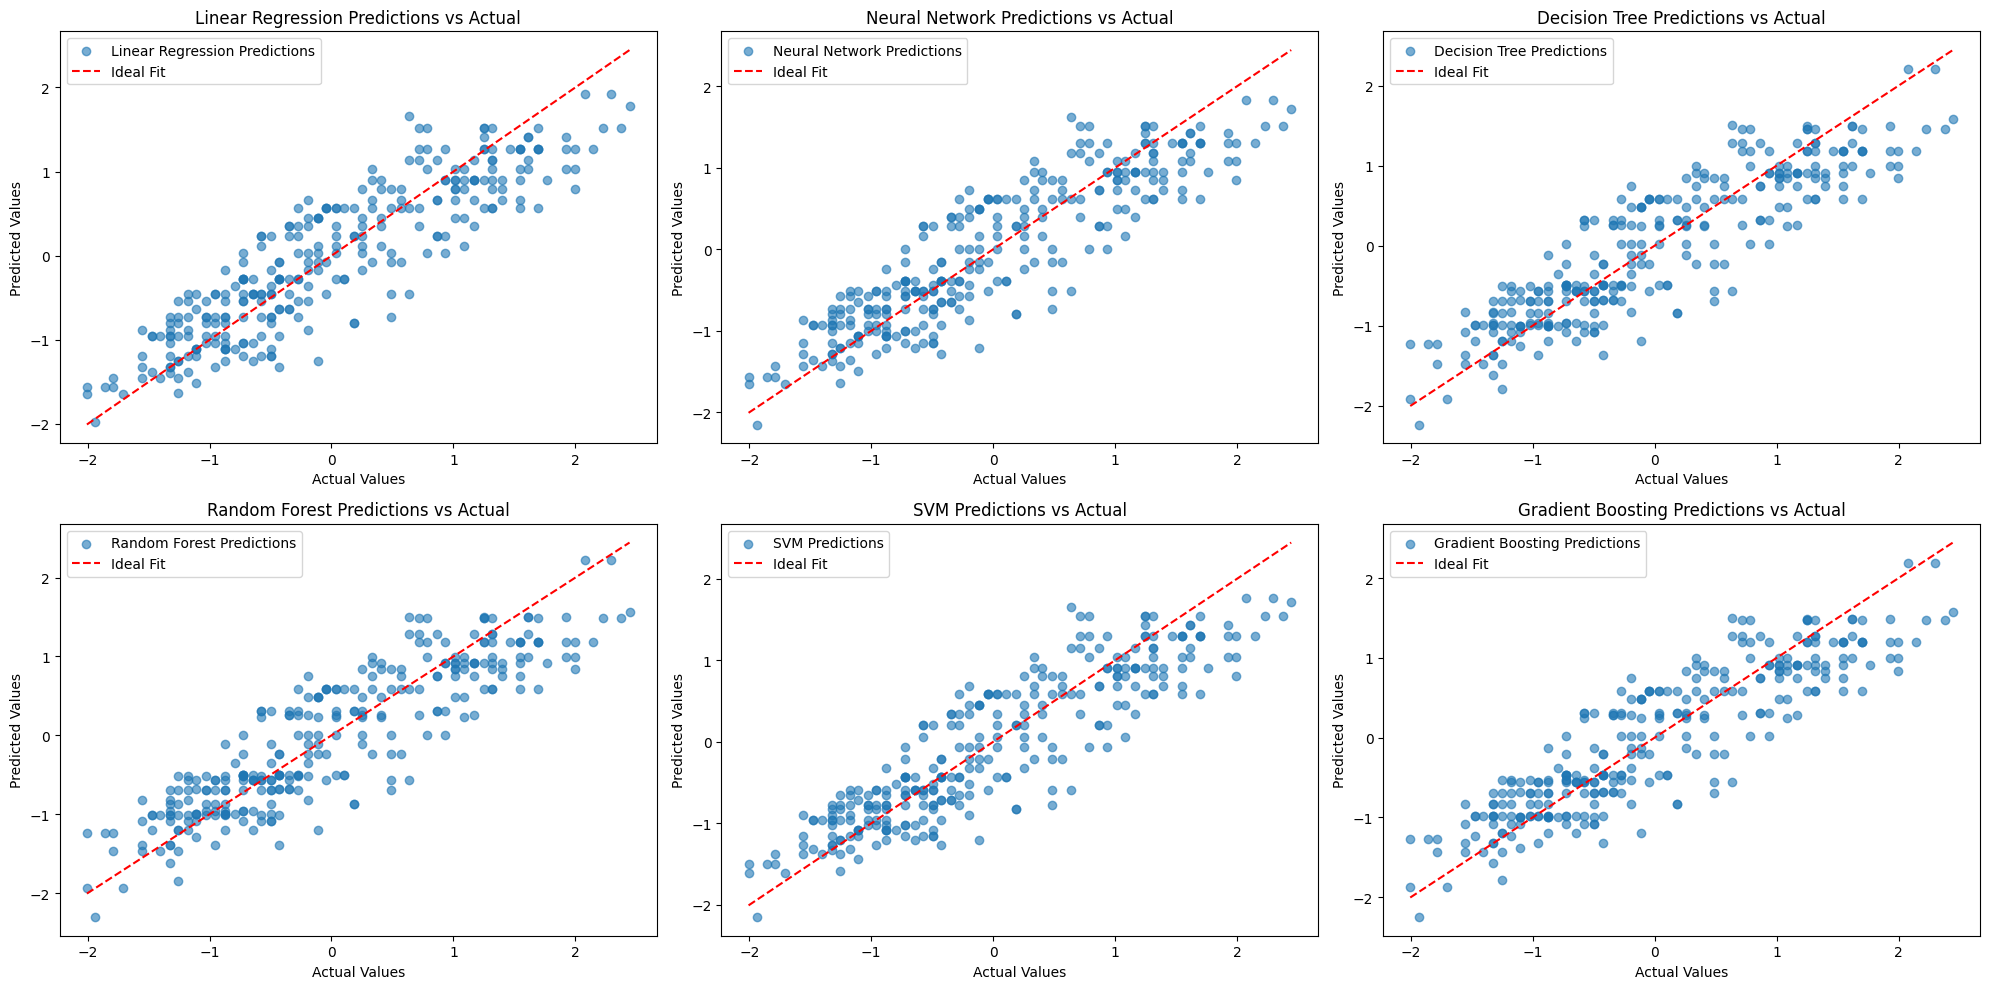


Best Model:
Model       Neural Network
MAE               0.374429
MSE               0.214067
R2 Score          0.796939
Name: 1, dtype: object


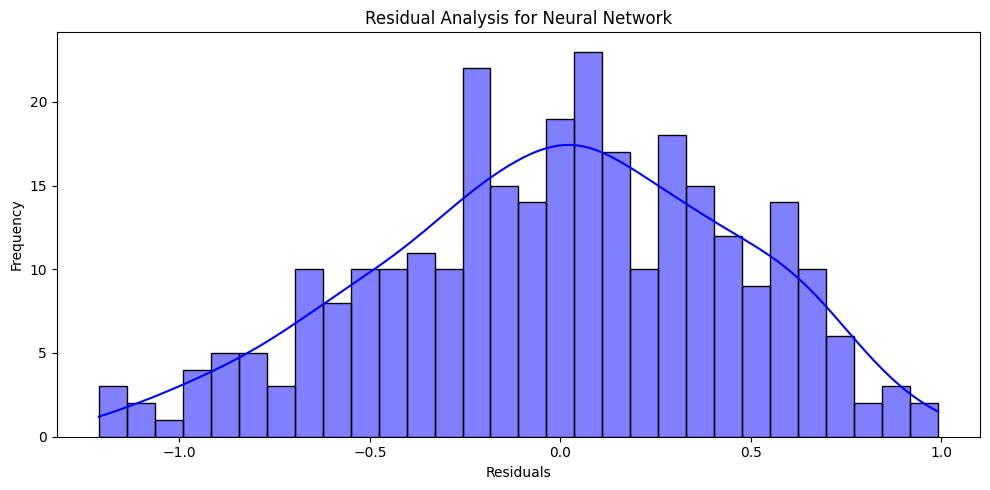

In [15]:
# Step 1: Compare Predicted vs Actual Values for Each Model
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Linear Regression': y_pred_lin,
    'Neural Network': y_pred_nn,
    'Decision Tree': y_pred_tree,
    'Random Forest': y_pred_forest,
    'SVM': y_pred_svr,
    'Gradient Boosting': y_pred_gboost
})

# Step 2: Plot Predicted vs Actual Values for Each Model
plt.figure(figsize=(20, 10))

models = ['Linear Regression', 'Neural Network', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting']
for i, model in enumerate(models, 1):
    plt.subplot(2, 3, i)
    plt.scatter(y_test, comparison_df[model], alpha=0.6, label=f'{model} Predictions')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Ideal Fit')
    plt.title(f'{model} Predictions vs Actual')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.tight_layout()

plt.show()

# Step 3: Identify the Best Model
best_model = results.loc[results['R2 Score'].idxmax()]
print("\nBest Model:")
print(best_model)

# Additional Evaluation: Residual Analysis for the Best Model
best_model_name = best_model['Model']
best_model_predictions = comparison_df[best_model_name]
residuals = best_model_predictions - y_test

plt.figure(figsize=(10, 5))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title(f'Residual Analysis for {best_model_name}')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()



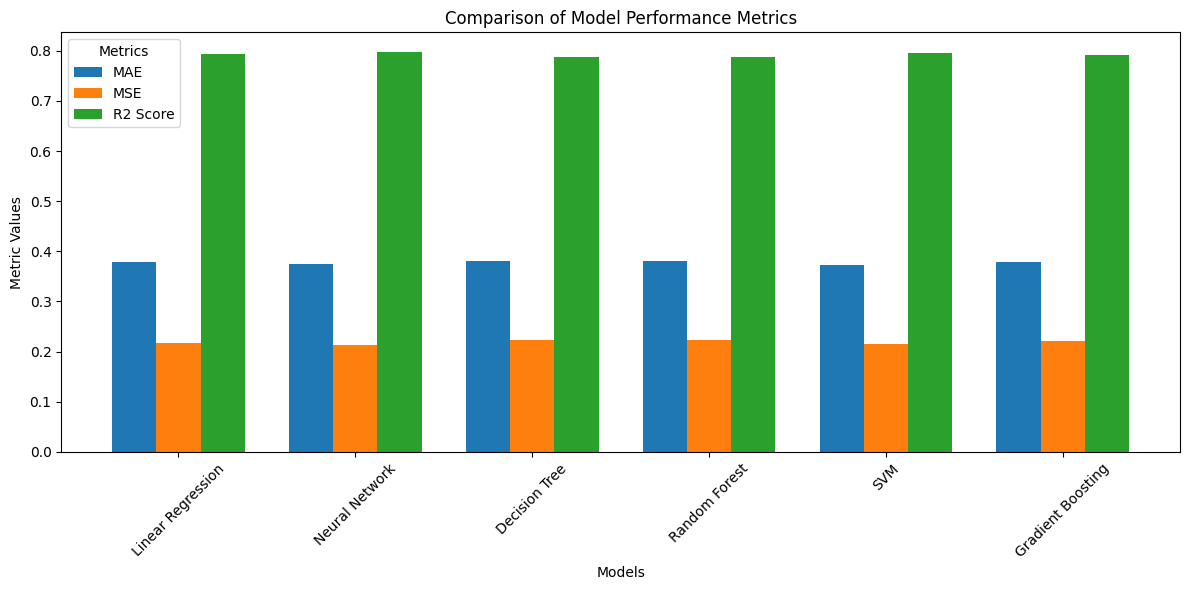

In [17]:
# Step 1: Prepare Data for Bar Chart
metrics = ['MAE', 'MSE', 'R2 Score']
models = ['Linear Regression', 'Neural Network', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting']

# Collect data from the results DataFrame
comparison_metrics = results.set_index('Model').loc[models, metrics]

# Step 2: Plot Bar Chart
plt.figure(figsize=(12, 6))

x = range(len(models))
width = 0.25

# Plot bars for each metric
for i, metric in enumerate(metrics):
    plt.bar([pos + width * i for pos in x], 
            comparison_metrics[metric], 
            width, 
            label=metric)

# Customize plot
plt.xticks([pos + width for pos in x], models, rotation=45)
plt.title('Comparison of Model Performance Metrics')
plt.xlabel('Models')
plt.ylabel('Metric Values')
plt.legend(title='Metrics')
plt.tight_layout()
plt.show()


Correlation matrix:
               temp_max  temp_min  precipitation      wind
temp_max       1.000000  0.875687      -0.228555 -0.164857
temp_min       0.875687  1.000000      -0.072684 -0.074185
precipitation -0.228555 -0.072684       1.000000  0.328045
wind          -0.164857 -0.074185       0.328045  1.000000


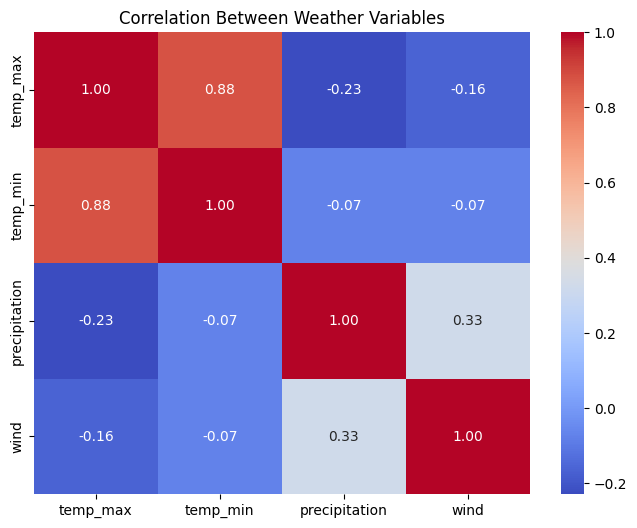

In [26]:
# Calculate correlation between numerical variables
correlation_matrix = data[['temp_max', 'temp_min', 'precipitation', 'wind']].corr()
print("Correlation matrix:")
print(correlation_matrix)

# Heatmap visualization of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Weather Variables')
plt.show()


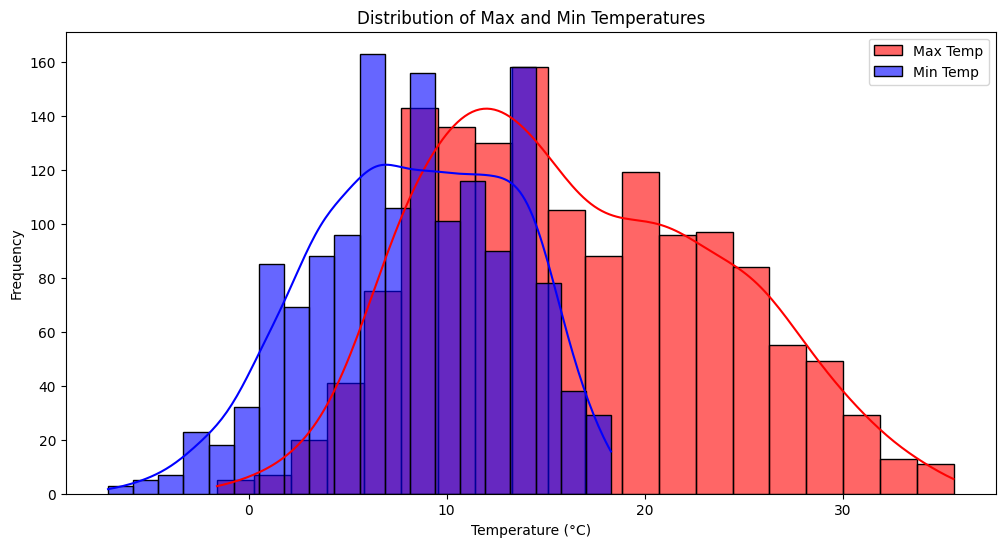

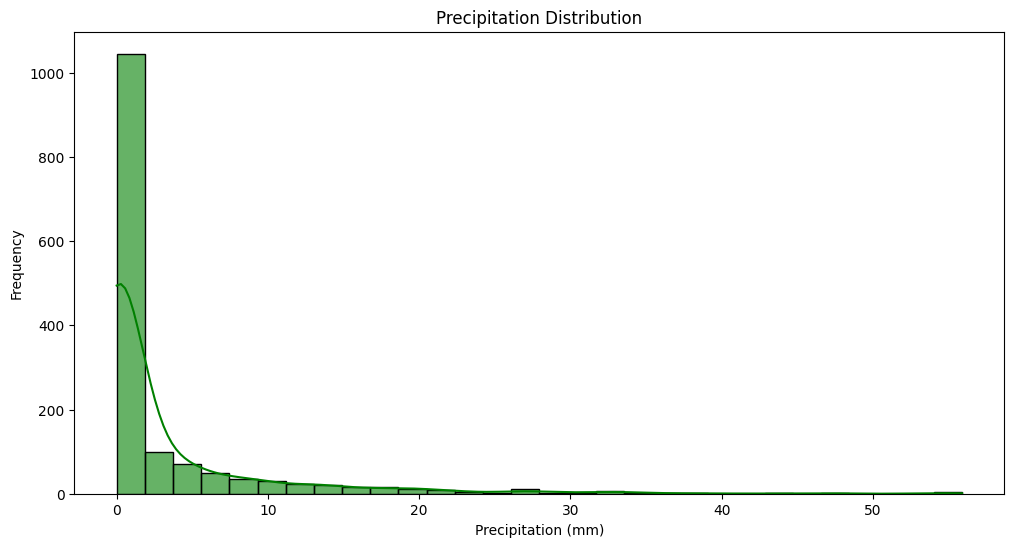

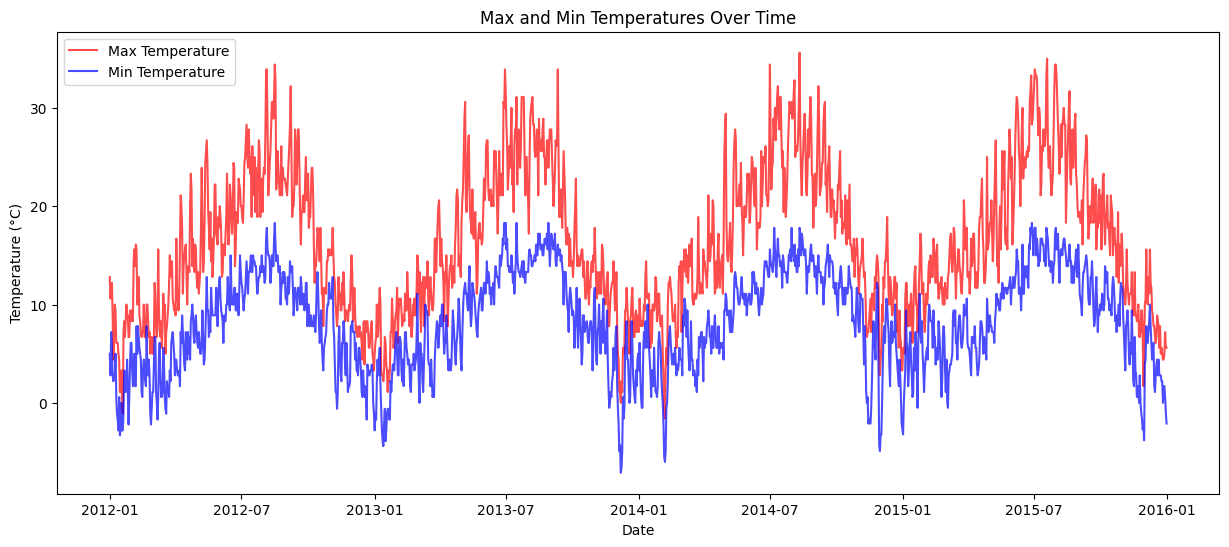

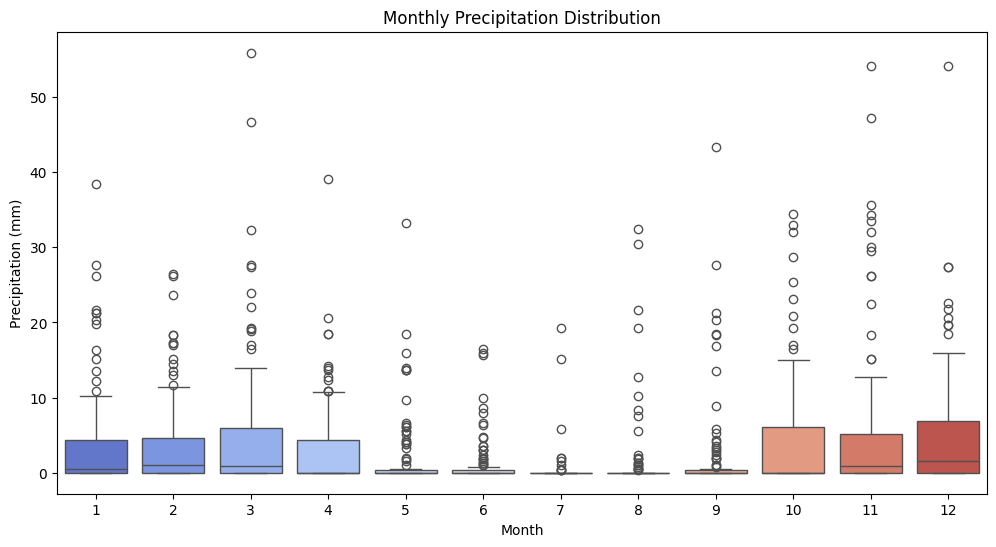

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv(r'C:\Users\diyag\Desktop\projects\python_practice\Data Science\projectttt\seattle-weather.csv')

# Convert date column to datetime format for proper time-series plotting
data['date'] = pd.to_datetime(data['date'])

# Initial Plots

# Plot 1: Distribution of Max and Min Temperatures
plt.figure(figsize=(12, 6))
sns.histplot(data['temp_max'], kde=True, color='red', label='Max Temp', bins=20, alpha=0.6)
sns.histplot(data['temp_min'], kde=True, color='blue', label='Min Temp', bins=20, alpha=0.6)
plt.title('Distribution of Max and Min Temperatures')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot 2: Precipitation Distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['precipitation'], kde=True, color='green', bins=30, alpha=0.6)
plt.title('Precipitation Distribution')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')
plt.show()

# Plot 3: Time Series of Max and Min Temperatures
plt.figure(figsize=(15, 6))
plt.plot(data['date'], data['temp_max'], label='Max Temperature', color='red', alpha=0.7)
plt.plot(data['date'], data['temp_min'], label='Min Temperature', color='blue', alpha=0.7)
plt.title('Max and Min Temperatures Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

# Plot 4: Boxplot for Monthly Precipitation
data['month'] = data['date'].dt.month
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='precipitation', data=data, palette='coolwarm')
plt.title('Monthly Precipitation Distribution')
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.show()
